In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import random as rn

## Tarea: Modelo climático

### Problema

La probabilidad de que llueva (en Bogotá) crece linealmente desde cero a partir de las 6 am hasta tomar su máximo
a las 2 pm. Luego decrece hasta llegar a cero a las 6 pm.

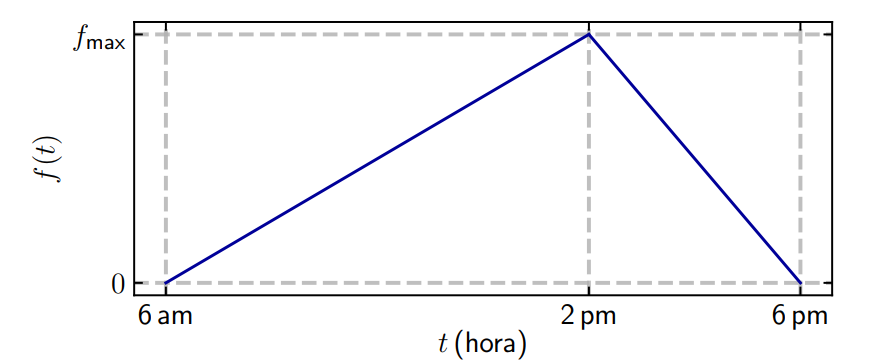

### Preguntas

#### 1. **Densidad de probabilidad**
Resolvemos primero el máximo para este problema utilizando geometría.

$$\text{area} = \frac{12 f_{max}}{2} = 1 \quad \Leftrightarrow \quad f_{max} = \frac{1}{6}$$

Luego, definimos esta función $P$ de *pdf* como:

$$P(x) = \left\{ \begin{array}{lcc} 0 & si & x < 6 \\  (1/48) x - (3/24) & si & 6 \leq x \leq 14 \\  -(1/24) x + (3/4) & si & 14 < x \leq 18 \\  0 & si & x > 18 \end{array} \right. $$

Se define el objeto `prob_lluvia(periodo)` para definir un estado general de lo relacionado con el problema, tanto su *pdf* con `P(x)`, las funciones que definen la probabilidad `.integral(hora)` y `.promedio(hora)`.

In [70]:
class prob_lluvia:
    """"Clase que define las probabilidades según conveniencia e inicializa los valores"""
    def __init__(self, periodo):
        """Se inicializan las variables y se establece la particion horas.
        El periodo debe entrar lo mejor posible en el rango."""
        self.periodo = periodo
        self.empieza = 6
        self.termina = 18
        self.N = 1
        self.f_max = self.N/6

        # particion
        self.particion = int((self.termina - self.empieza) / self.periodo) + 1
        self.horas = np.linspace(self.empieza, self.termina, num=self.particion)

    def P(self, x):
        """Función de densidad de probabilidad."""
        if x < 6:
            return 0
        elif 6 <= x <= 14:
            return ((1/8) * x - (3/4)) * self.f_max
        elif 14 < x <= 18:
            return (-(1/4) * x + (9/2)) * self.f_max
        elif x > 18:
            return 0

    def floor(self, hora):
        for x in self.horas:
            if hora >= x and hora < (x + self.periodo) and not(np.isclose(hora, x + self.periodo, atol=1e-4)): return x
        return 0

    def integral(self, hora):
        '''Toma la hora absoluta (0-24 horas) y devuelve la probabilidad 
        como el area en el periodo de la función discretizada'''

        if hora < self.empieza or hora > self.termina: return 0
        hora = self.floor(hora)
        return (self.periodo * (self.P(hora) + self.P(hora + self.periodo)) / 2 ) # Area de trapecio
    
    def promedio(self, hora):
        '''Toma la hora absoluta (0-24 horas) y devuelve la probabilidad 
        como media entre la función discretizada por el periodo.'''

        if hora < self.empieza or hora > self.termina: return 0
        hora = self.floor(hora)
        return self.P(hora + self.periodo / 2)   # Promedio valores

# Algunas comprobaciones
pl1 = prob_lluvia(periodo = 1)
print(f"""
      Probabilidad: {pl1.integral(8.7)} 
      Probabilidad total promedio: {np.sum([pl1.promedio( hora ) for hora in pl1.horas]):.4f}
      Probabilidad total integral: {np.sum([pl1.integral( hora ) for hora in pl1.horas]):.4f}
""")

[pl1.promedio( hora ) - pl1.integral( hora ) for hora in pl1.horas]



      Probabilidad: 0.05208333333333333 
      Probabilidad total promedio: 1.0000
      Probabilidad total integral: 1.0000



[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

Se comprueba entonces que:
- Las funciones de probabilidad están normalizadas a 1.
- Las diferencias entre las formas de tomar la probabilidad son despreciables.

#### 2. **Obtener $f_{max}$**
Cómo se indicó en el punto previo, se resolvió tomando geométricamente el área y resolviendo el punto máximo para que la función de probabilidad fuera normalizada a 1. Como se sugiere también, dado que $f_{max}$ es el carácter que provee a la función la normalizacion, que se pueda generalizar como:

$$\text{area} = \frac{12 f_{max}}{2} = N \quad \Leftrightarrow \quad f_{max} = \frac{N}{6}$$

Luego, definimos esta función $P$ de *pdf* como:

$$P(x) = \left\{ \begin{array}{lcc} 0 & si & x < 6 \\  f_{max}((1/8) x - (3/4)) & si & 6 \leq x \leq 14 \\  f_{max}(-(1/4) x + (9/2)) & si & 14 < x \leq 18 \\  0 & si & x > 18 \end{array} \right. $$

Podemos despejar la normalización para tenerla como parámetro en nuestro objeto `prob_lluvia` y de esa manera generalizarlo aún más.

#### 3. Gráficas y Función Acumulativa

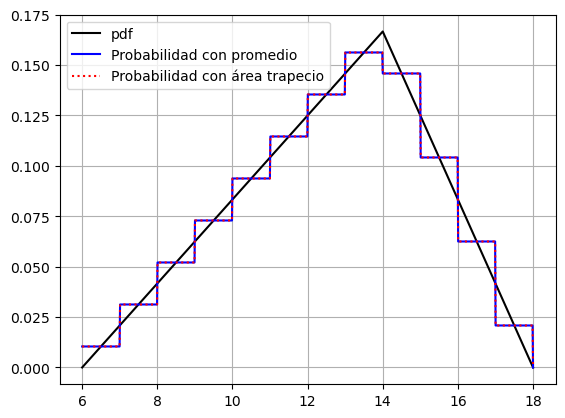

In [106]:
pl = prob_lluvia(1)

x_vals = pl.horas

x = np.linspace(min(x_vals), max(x_vals), 1000)
plt.plot(x, [pl.P(i) for i in x], color="black", label="pdf")
plt.plot(x, [pl.promedio(horas) for horas in x], color="blue", label="Probabilidad con promedio")
plt.plot(x, [pl.integral(horas) for horas in x], ls="dotted", color="red", label="Probabilidad con área trapecio")
plt.grid()

# Añadir leyenda para más claridad
plt.legend()

# Mostrar el gráfico
plt.show()



Se genera la función acumulativa $F$ y se grafica.

[0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0]


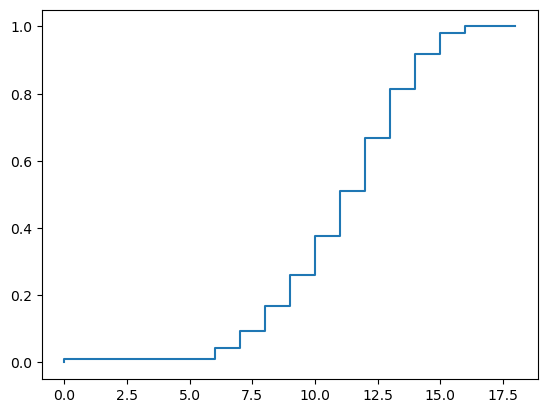

In [113]:
# acumulador
F = [0]
acum = 0
for hora in pl.horas:
    acum += pl.integral(hora)
    F.append(acum)

x_val = [0]
for hora in pl.horas: x_val.append(hora)
print(x_val)
plt.plot(x_val, F, ds="steps")


#### 4. Experimento

Se genera el experimento en historias (eventos) aleatorios.

In [136]:
pl1 = prob_lluvia(1)


# Por cada historia
def experimento(pl, historias):
    dim_pdf = len(pl.horas)
    #rn.seed(123)
    histograma = np.array([0]*dim_pdf)
    for i in range(historias):
        r = rn.random()
        # Busqueda ubicacion en el histograma
        for j in np.arange(1, dim_pdf):
            if r >= F[j-1] and r < F[j]:
                bingo = j
                break
        histograma[bingo] += 1
    return histograma


Pruebe cambiando el valor de `eventos` para cada valor deseado:
- 30
- 365
- 1000
- $10^6$

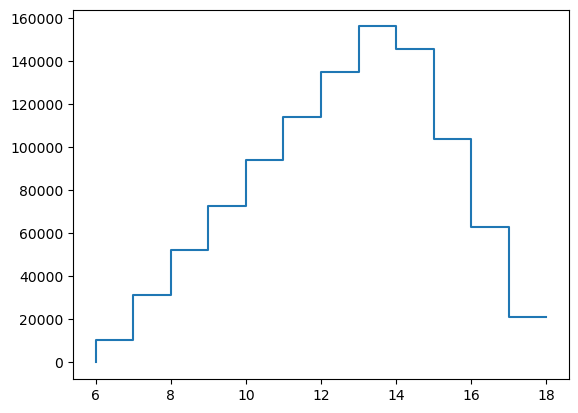

In [205]:
eventos = 1e6

eventos = int(eventos)

x_vals = pl.horas

# experimental
plt.plot(pl.horas, experimento(pl, eventos), ds="steps")

#### 5. Verificar

(a) Se verifica que el comportamiento es como se desea determinar solapando cada gráfica requerida.

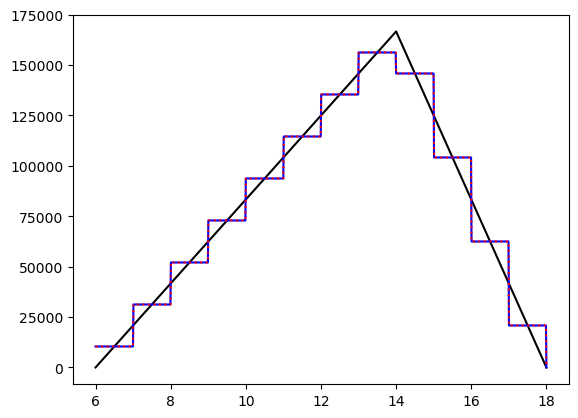

In [206]:
eventos = 1e6

eventos = int(eventos)

x_vals = pl.horas

# teórica
x = np.linspace(min(x_vals), max(x_vals), 1000)
plt.plot(x, [pl.P(i) * eventos for i in x], color="black", label="pdf")
plt.plot(x, [pl.promedio(horas) * eventos for horas in x], color="blue", label="Probabilidad con promedio")
plt.plot(x, [pl.integral(horas) * eventos for horas in x], ls="dotted", color="red", label="Probabilidad con área trapecio")

# experimental

(b) Para comparar los resultados, se escala proporcional el número de eventos se prueben, dado que la probabilidad toma en cuenta la proporción de la población que se va a medir tan solo hace falta multiplicarlos como `pl.promedio(horas) * eventos` visto anteriormente en el código.